In [1]:
import xarray as xr
import cmocean 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy
import cartopy.crs as ccrs
import cftime
import numpy as np

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

## Assessment of Geostrophic Balance
This dataset contains:
- sea surface height (SSH --> zos) (referenced to a global mean of zero)
- zonal (u --> uo) and meridional (v --> vo) velocities 
at daily temporal resolution.


Goal is to assess the accuracy of the geostrophic balance approximation:
- step: horizontal gradient estimation (dh/dx, dh/dy --> convert lat/lon to distance) 
- step: geostrophic velocity estimation (leverage the geostrophic balance relationship to find geostrophic velocities u_g, v_g)
- step: calculate difference between surface velocities (uo,vo) and surface geostrophic velocities (difference between u and u_g, v and v_g)


Questions to address/explore:
- question 1: consider and plot differences between u_g and uo, v_g and vo as a function of timescale (e.g. using a single time slice vs. a long time mean)
- question 2: how sensitive are results to the length scale over which a gradient is calculated? (remember velocities have to be averaged across the same length scale). Choose a second length scale to compute gradient and estimate velocity difference (think of center difference methods and/or linear slope fitting)
- question 3: compute relative vorticity at a single time slice and for the time mean

In [3]:
glorys_jan_mar_2021 = xr.open_zarr('../data/glorys_jan_mar_2021_daily_surface')

In [9]:
print(glorys_jan_mar_2021)

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 385, longitude: 950, time: 90)
Coordinates:
  * depth      (depth) float32 0.494025
  * latitude   (latitude) float32 19.25 19.333334 19.416666 ... 51.166668 51.25
  * longitude  (longitude) float32 -87.24999 -87.166664 ... -8.24999 -8.1666565
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-03-31
Data variables:
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 dask.array<chunksize=(12, 97, 238), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    commen

In [5]:
zos = glorys_jan_mar_2021.zos.isel(time=20).load()

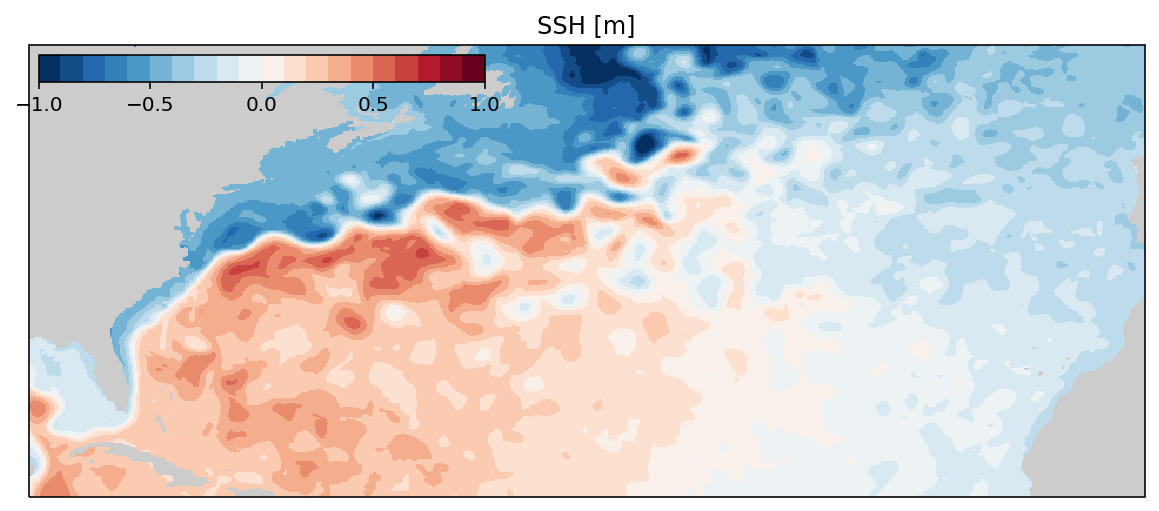

In [6]:
f, ax = plt.subplots(1,1,figsize=(10,8),subplot_kw={'projection':ccrs.PlateCarree()})
pp = ax.pcolor(zos.longitude, zos.latitude, zos, vmin=-1, vmax=1, \
          cmap=plt.get_cmap('RdBu_r',20),transform=ccrs.PlateCarree())
ax.set_facecolor('#cccccc')
ax.set_title('SSH [m]')
axins1 = inset_axes(ax, width="40%",height="6%",loc="upper left")
ax.xaxis.set_ticks_position("top")
f.colorbar(pp, cax=axins1, orientation="horizontal")
ax.grid()

In [7]:
# sample surface velocities
ss_u = glorys_jan_mar_2021.isel(time=20).uo.isel(depth=0).load()
ss_v = glorys_jan_mar_2021.isel(time=20).vo.isel(depth=0).load()
speed = 0.5*(ss_u**2 + ss_v**2)

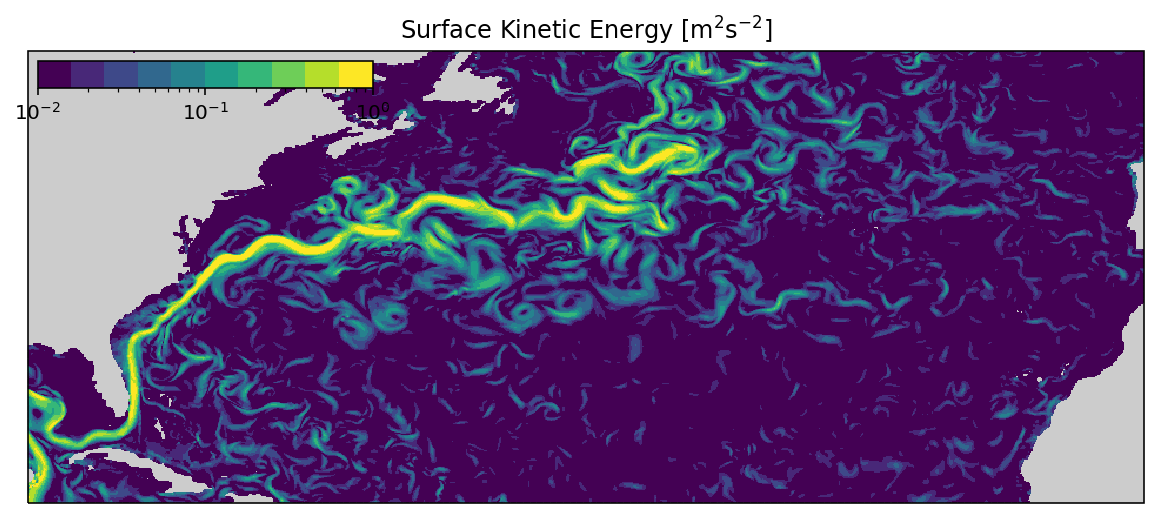

In [8]:
f, ax = plt.subplots(1,1,figsize=(10,8),subplot_kw={'projection':ccrs.PlateCarree()})
pp = ax.pcolor(ss_u.longitude, ss_u.latitude, speed, norm=LogNorm(vmin=0.01, vmax=1), \
          cmap=plt.get_cmap('viridis',10),transform=ccrs.PlateCarree())
ax.set_title(r'Surface Kinetic Energy [m$^2$s$^{-2}$]')
ax.set_facecolor('#cccccc')
axins1 = inset_axes(ax, width="30%",height="6%",loc="upper left")
ax.xaxis.set_ticks_position("top")
f.colorbar(pp, cax=axins1, orientation="horizontal")
ax.grid()